# 15회차: DC-GAN을 활용한 손글씨 모방하기 (1) - 이론과 개념

In [ ]:
# 시각화 준비
!pip install koreanize_matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.2 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 1. MNIST 데이터 불러오기 (Tensor로 변환하지 않고 PIL 그대로 불러옴)
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# 자료형 image를 numpy ndarray로 모두 변환해 3차원 배열로
x_train = np.stack([np.array(img) for img, _ in mnist_train])
y_train = np.array([label for _, label in mnist_train])
x_test = np.stack([np.array(img) for img, _ in mnist_test])
y_test = np.array([label for _, label in mnist_test])

In [ ]:
# 2. 데이터 기본 정보 출력
print("훈련 데이터 shape:", x_train.shape)   # (60000, 28, 28)
print("테스트 데이터 shape:", x_test.shape)  # (10000, 28, 28)
print("훈련 레이블 개수:", len(y_train))

# 3. 레이블 통계 확인
label_counts = Counter(y_train)
print("\n클래스별 샘플 수:")
for label, count in sorted(label_counts.items()):
    print(f"숫자 {label}: {count}개")

훈련 데이터 shape: (60000, 28, 28)
테스트 데이터 shape: (10000, 28, 28)
훈련 레이블 개수: 60000

클래스별 샘플 수:
숫자 0: 5923개
숫자 1: 6742개
숫자 2: 5958개
숫자 3: 6131개
숫자 4: 5842개
숫자 5: 5421개
숫자 6: 5918개
숫자 7: 6265개
숫자 8: 5851개
숫자 9: 5949개


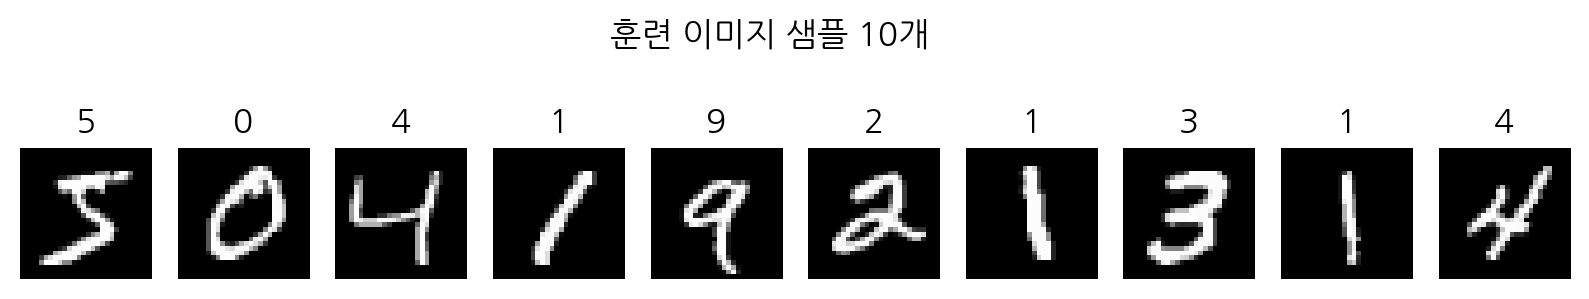

In [ ]:
# 4. 임의의 숫자 이미지 10개 출력
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.suptitle("훈련 이미지 샘플 10개")
plt.show()

## 종료